# Classification of Health Data Indicators to determine Diabetes in a patient

Name: Deepesh Kumar Barmat Rajendra

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, classification_report, roc_curve, auc, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings

In [2]:
warnings.filterwarnings('ignore')

Data Read

In [3]:
data_df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [7]:
data_df['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,35346
1.0,35346


### Data Preparation

In [8]:
# Getting Features and Target from data
train_data_df = data_df.copy(deep = True)
y = train_data_df['Diabetes_binary']
X = train_data_df.drop('Diabetes_binary', axis=1)

In [9]:
# Breaking data into Training, Validation and Testing Datasets
scalar = StandardScaler()
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# Creating Copy for Naïve Bayes as they do not need normalized data
X_train_copy = X_train.copy(deep=True)
X_val_copy = X_val.copy(deep=True)
X_test_copy = X_test.copy(deep=True)

# Data Normalization
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X.columns)
X_val = pd.DataFrame(scalar.transform(X_val), columns=X.columns)
X_test = pd.DataFrame(scalar.transform(X_test), columns=X.columns)

In [10]:
X_train.shape, X_val.shape, X_test.shape

((49482, 21), (10606, 21), (10604, 21))

#### Common Functions

In [15]:
classes = {0: 'no diabetes/prediabetes', 1: 'diabetes'}

In [16]:
# Display Confusion Matrix
def confusion_matrix_plot(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(classes.values()), yticklabels=list(classes.values()))
  plt.xticks(rotation=0)
  plt.yticks(rotation=0)
  plt.title("Confusion Matrix")
  plt.show()

In [40]:
# Print Data Metrics
def scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    confusion_matrix_plot(y_test, y_pred)
    print("\nClassification Report:")
    class_report = classification_report(y_test, y_pred, output_dict=True, target_names=list(classes.values()))
    report_df = pd.DataFrame(class_report).transpose()
    print(tabulate(report_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
    return

In [35]:
# Returns Data Metrics
def get_scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    roc_c = roc_curve(y_test, y_pred)
    return accuracy, f1, recall, precision, roc_c

## K Neighbors Classification (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Returns the best k for K Neighbours Classification
def bestk(X_train, y_train, X_val, y_val):
    acc = []
    # Range Calculated based on trial and error
    for k in range(31, 41):
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_val)
        acc.append(accuracy_score(y_val,y_pred))
        print(f"For k = {k} : {accuracy_score(y_val,y_pred) * 100:.2f}%")

    k = np.argmax(acc) + 31
    print(f"Best K = {k} with accuracy = {acc[np.argmax(acc)] * 100:.2f}%")
    return k

In [56]:
k = bestk(X_train, y_train, X_val, y_val)
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

For k = 31 : 73.69%
For k = 32 : 73.71%
For k = 33 : 73.77%
For k = 34 : 73.75%
For k = 35 : 73.77%
For k = 36 : 73.84%
For k = 37 : 73.94%
For k = 38 : 73.88%
For k = 39 : 73.97%
For k = 40 : 74.01%
Best K = 40 with accuracy = 74.01%


Accuracy: 74.42%
F1 Score: 74.38%
Recall: 74.42%
Precision: 72.46%


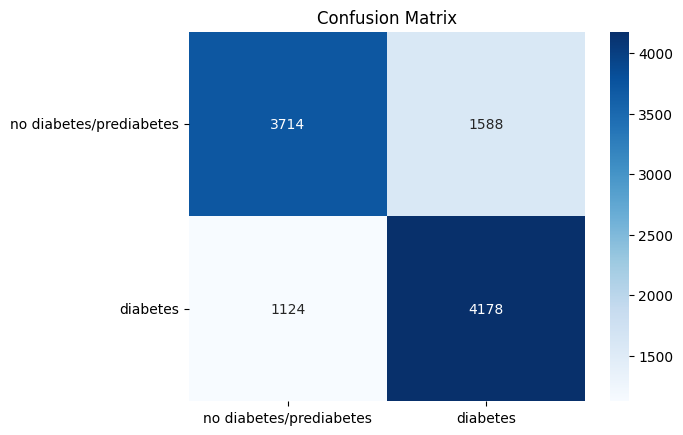


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.77 |     0.70 |       0.73 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.72 |     0.79 |       0.75 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.74 |     0.74 |       0.74 |      0.74 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.75 |     0.74 |       0.74 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.75 |     0.74 |       0.74 |  10604.00 |
+-------------------------+-------------

In [57]:
scores(y_test, y_pred_knn)

## Decision Tree Classification (DTree)

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [59]:
# Returns Trained Decision Tree
def dtree_class(X_train, y_train, X_val, y_val):
    dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_split=5, min_samples_leaf=5)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_val)
    print(f"Accuracy for Decision Tree Validation : {accuracy_score(y_val, y_pred) * 100:.2f}%")
    return dtree

In [60]:
dtree = dtree_class(X_train, y_train, X_val, y_val)
y_pred_dtree = dtree.predict(X_test)

Accuracy for Decision Tree Validation : 74.13%


Accuracy: 73.91%
F1 Score: 73.84%
Recall: 73.91%
Precision: 71.74%


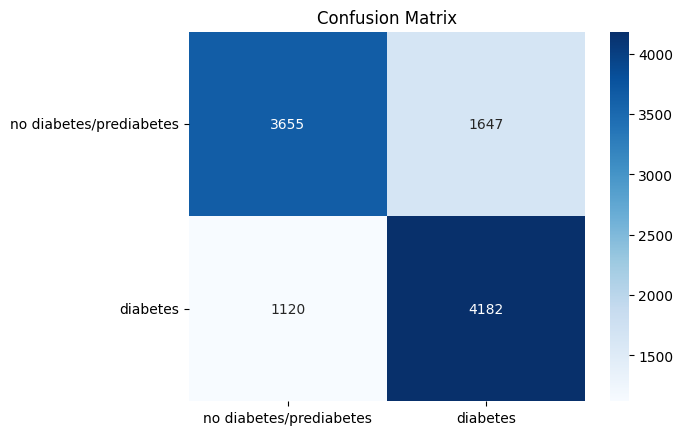


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.77 |     0.69 |       0.73 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.72 |     0.79 |       0.75 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.74 |     0.74 |       0.74 |      0.74 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.74 |     0.74 |       0.74 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.74 |     0.74 |       0.74 |  10604.00 |
+-------------------------+-------------

In [61]:
scores(y_test,y_pred_dtree)

## Logistic Regression (LR)

In [43]:
from sklearn.linear_model import LogisticRegression

In [62]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_val)
print(f"Accuracy for Logistic Regression Validation : {accuracy_score(y_val, y_pred) * 100:.2f}%")

Accuracy for Logistic Regression Validation : 74.81%


In [63]:
y_pred_lr = log_reg.predict(X_test)

Accuracy: 74.95%
F1 Score: 74.95%
Recall: 74.95%
Precision: 74.11%


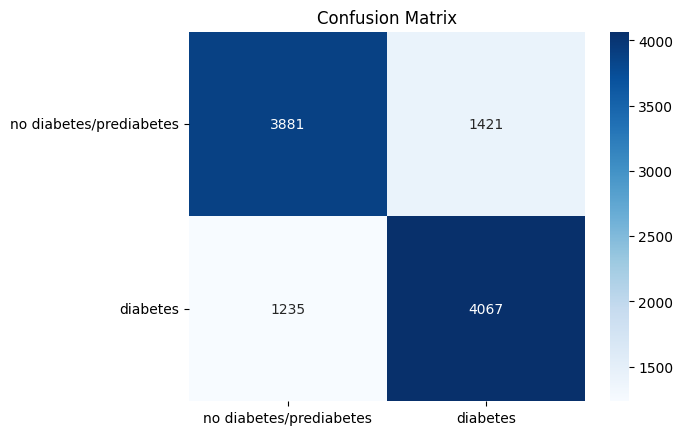


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.76 |     0.73 |       0.75 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.74 |     0.77 |       0.75 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.75 |     0.75 |       0.75 |      0.75 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.75 |     0.75 |       0.75 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.75 |     0.75 |       0.75 |  10604.00 |
+-------------------------+-------------

In [64]:
scores(y_test,y_pred_lr)

## Naive Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

Multinomial Naïve Bayes

In [75]:
mnb = MultinomialNB()
mnb.fit(X_train_copy, y_train)
y_pred = mnb.predict(X_val_copy)
print(f"Accuracy for Naive Bayes Validation : {accuracy_score(y_val, y_pred) * 100:.2f}%")

Accuracy for Naive Bayes Validation : 60.58%


In [76]:
y_pred_mnb = mnb.predict(X_test_copy)

Accuracy: 60.46%
F1 Score: 58.89%
Recall: 60.46%
Precision: 67.17%


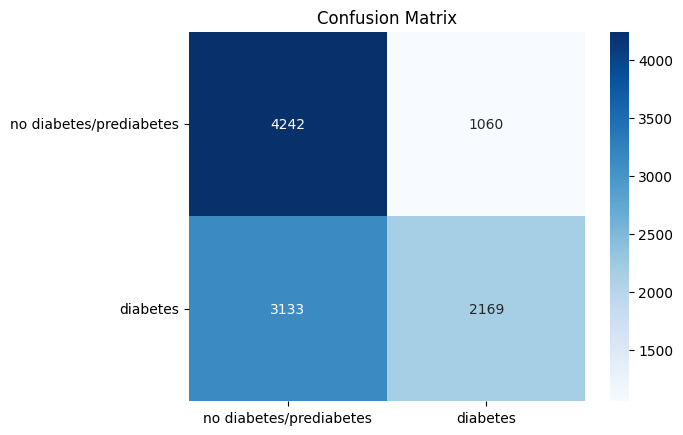


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.58 |     0.80 |       0.67 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.67 |     0.41 |       0.51 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.60 |     0.60 |       0.60 |      0.60 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.62 |     0.60 |       0.59 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.62 |     0.60 |       0.59 |  10604.00 |
+-------------------------+-------------

In [77]:
scores(y_test, y_pred_mnb)

Gaussian Naïve Bayes

In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_val)
print(f"Accuracy for Gaussian Naive Bayes Validation : {accuracy_score(y_val, y_pred) * 100:.2f}%")

Accuracy for Gaussian Naive Bayes Validation : 71.93%


In [100]:
y_pred_gnb = gnb.predict(X_test)

Accuracy: 71.86%
F1 Score: 71.86%
Recall: 71.86%
Precision: 72.42%


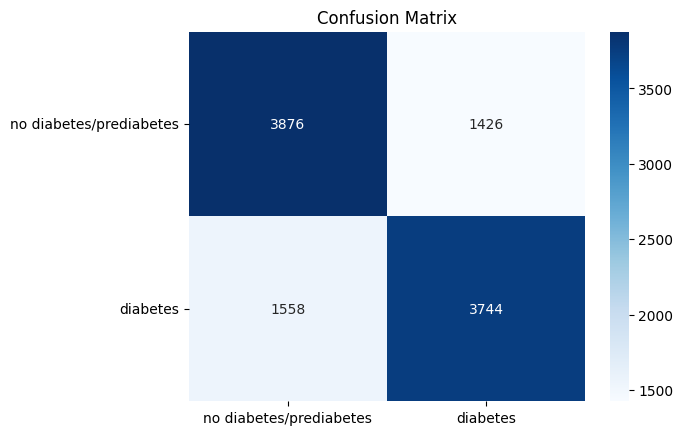


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.71 |     0.73 |       0.72 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.72 |     0.71 |       0.72 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.72 |     0.72 |       0.72 |      0.72 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.72 |     0.72 |       0.72 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.72 |     0.72 |       0.72 |  10604.00 |
+-------------------------+-------------

In [101]:
scores(y_test, y_pred_gnb)

Bernoulli Naïve Bayes

In [69]:
bnb = BernoulliNB()
bnb.fit(X_train_copy, y_train)
y_pred = bnb.predict(X_val_copy)
print(f"Accuracy for Bernoulli Naive Bayes Validation : {accuracy_score(y_val, y_pred) * 100:.2f}%")

Accuracy for Bernoulli Naive Bayes Validation : 70.50%


In [70]:
y_pred_bnb = bnb.predict(X_test_copy)

Accuracy: 71.10%
F1 Score: 71.09%
Recall: 71.10%
Precision: 71.65%


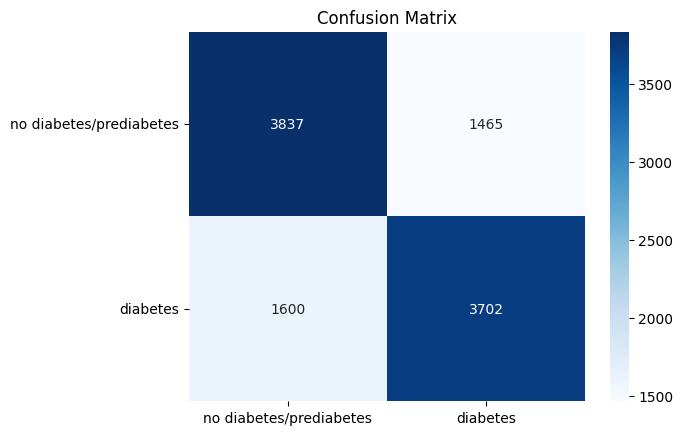


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.71 |     0.72 |       0.71 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.72 |     0.70 |       0.71 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.71 |     0.71 |       0.71 |      0.71 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.71 |     0.71 |       0.71 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.71 |     0.71 |       0.71 |  10604.00 |
+-------------------------+-------------

In [72]:
scores(y_test,y_pred_bnb)

## Linear Discriminant Analysis (LDA)

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_val)
print(f"Accuracy for Linear Discriminant Analysis Validation : {accuracy_score(y_val, y_pred) * 100:.2f}%")

Accuracy for Linear Discriminant Analysis Validation : 74.81%


In [78]:
y_pred_lda = lda.predict(X_test)

Accuracy: 74.92%
F1 Score: 74.91%
Recall: 74.92%
Precision: 73.68%


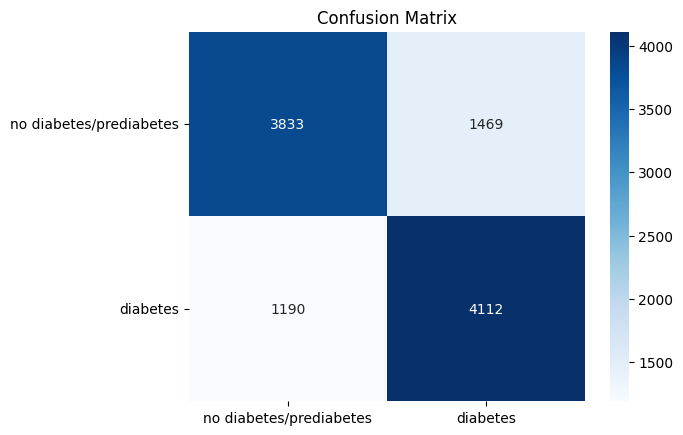


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.76 |     0.72 |       0.74 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.74 |     0.78 |       0.76 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.75 |     0.75 |       0.75 |      0.75 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.75 |     0.75 |       0.75 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.75 |     0.75 |       0.75 |  10604.00 |
+-------------------------+-------------

In [79]:
scores(y_test,y_pred_lda)

## Random Forest Classification (RF)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Returns a random forest classifier model
def random_forest(X_train, y_train, X_val, y_val):
    clf = RandomForestClassifier(max_depth=8, min_samples_split=5, min_samples_leaf=4, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"Accuracy for Random Forest Classification Validation : {accuracy_score(y_val, y_pred) * 100:.2f}%")
    return clf

In [82]:
clf = random_forest(X_train,y_train,X_val,y_val)
y_pred_rfc = clf.predict(X_test)

Accuracy for Random Forest Classification Validation : 75.01%


Accuracy: 74.91%
F1 Score: 74.86%
Recall: 74.91%
Precision: 72.88%


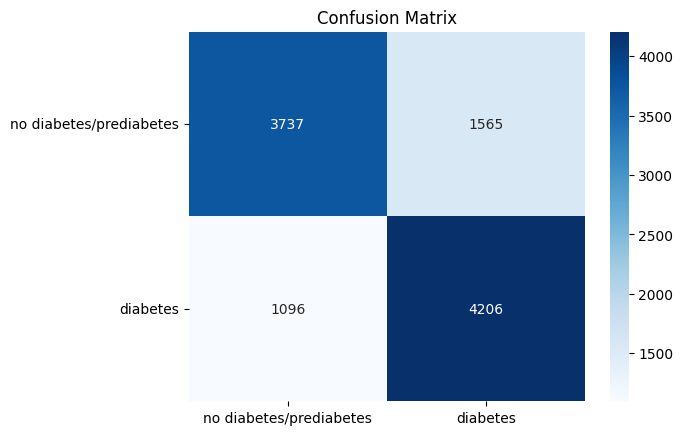


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.77 |     0.70 |       0.74 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.73 |     0.79 |       0.76 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.75 |     0.75 |       0.75 |      0.75 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.75 |     0.75 |       0.75 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.75 |     0.75 |       0.75 |  10604.00 |
+-------------------------+-------------

In [84]:
scores(y_test, y_pred_rfc)

## Artificial Neural Network (ANN)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, Precision
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
# Returns a trained neural network
def ann_class(X_train, y_train, X_val, y_val):
    # Model architecture
    nnet = Sequential()
    nnet.add(Dense(len(X.columns), input_dim=len(X.columns), activation='relu'))
    nnet.add(Dense(63, activation='relu'))
    nnet.add(Dropout(0.5))
    nnet.add(Dense(15, activation='relu'))
    nnet.add(Dropout(0.5))
    nnet.add(Dense(1, activation='sigmoid'))

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Compile the model
    nnet.compile(
          loss='binary_crossentropy',
          optimizer=Adam(learning_rate=0.0001),
          metrics=[BinaryAccuracy(), Precision()]
      )

    # Train the model
    nnet.fit(
            X_train, y_train,
            epochs=100,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping]
        )

    return nnet

In [96]:
nnet = ann_class(X_train, y_train, X_val, y_val)
loss, accuracy, precision = nnet.evaluate(X_test, y_test)

Epoch 1/100
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.5638 - loss: 0.6941 - precision_1: 0.5566 - val_binary_accuracy: 0.7247 - val_loss: 0.5729 - val_precision_1: 0.6978
Epoch 2/100
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.6858 - loss: 0.6027 - precision_1: 0.6628 - val_binary_accuracy: 0.7401 - val_loss: 0.5381 - val_precision_1: 0.7071
Epoch 3/100
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.7085 - loss: 0.5775 - precision_1: 0.6784 - val_binary_accuracy: 0.7447 - val_loss: 0.5236 - val_precision_1: 0.7120
Epoch 4/100
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.7241 - loss: 0.5600 - precision_1: 0.6908 - val_binary_accuracy: 0.7449 - val_loss: 0.5182 - val_precision_1: 0.7130
Epoch 5/100
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.7289 - loss: 0.5554 - precision_1: 0.6961 - val_binary_accuracy: 0.7463 - val_loss: 0.5157 - val_precision_1: 0.7134
Epoch 6/100
1547/1547 ━━━━━━━━━━━━━

In [97]:
y_pred_ann = nnet.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy: 75.55%
F1 Score: 75.48%
Recall: 75.55%
Precision: 73.14%


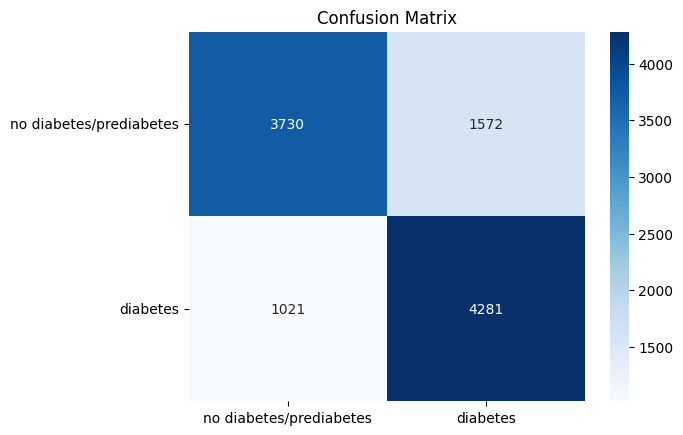


Classification Report:
+-------------------------+-------------+----------+------------+-----------+
|                         |   precision |   recall |   f1-score |   support |
+=========================+=============+==========+============+===========+
| no diabetes/prediabetes |        0.79 |     0.70 |       0.74 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| diabetes                |        0.73 |     0.81 |       0.77 |   5302.00 |
+-------------------------+-------------+----------+------------+-----------+
| accuracy                |        0.76 |     0.76 |       0.76 |      0.76 |
+-------------------------+-------------+----------+------------+-----------+
| macro avg               |        0.76 |     0.76 |       0.75 |  10604.00 |
+-------------------------+-------------+----------+------------+-----------+
| weighted avg            |        0.76 |     0.76 |       0.75 |  10604.00 |
+-------------------------+-------------

In [98]:
scores(y_test,y_pred_ann)

## Metrics

In [102]:
# Creating a dictionary storing the list of metrics for each model
score_list = {}
score_list['KNN'] = list(get_scores(y_test, y_pred_knn))
score_list['DTree'] = list(get_scores(y_test, y_pred_dtree))
score_list['LR'] = list(get_scores(y_test, y_pred_lr))
score_list['MNB'] = list(get_scores(y_test, y_pred_mnb))
score_list['GNB'] = list(get_scores(y_test, y_pred_gnb))
score_list['BNB'] = list(get_scores(y_test, y_pred_bnb))
score_list['LDA'] = list(get_scores(y_test, y_pred_lda))
score_list['RF'] = list(get_scores(y_test, y_pred_rfc))
score_list['ANN'] = list(get_scores(y_test, y_pred_ann))

In [104]:
# Converting the Dict to a DataFrame
results_df = pd.DataFrame.from_dict({
    model_name: {
        "Accuracy": scores[0],
        "F1 Score": scores[1],
        "Recall": scores[2],
        "Precision": scores[3],
        "ROC Curve": scores[4]
    }
    for model_name, scores in score_list.items()
}, orient='index')

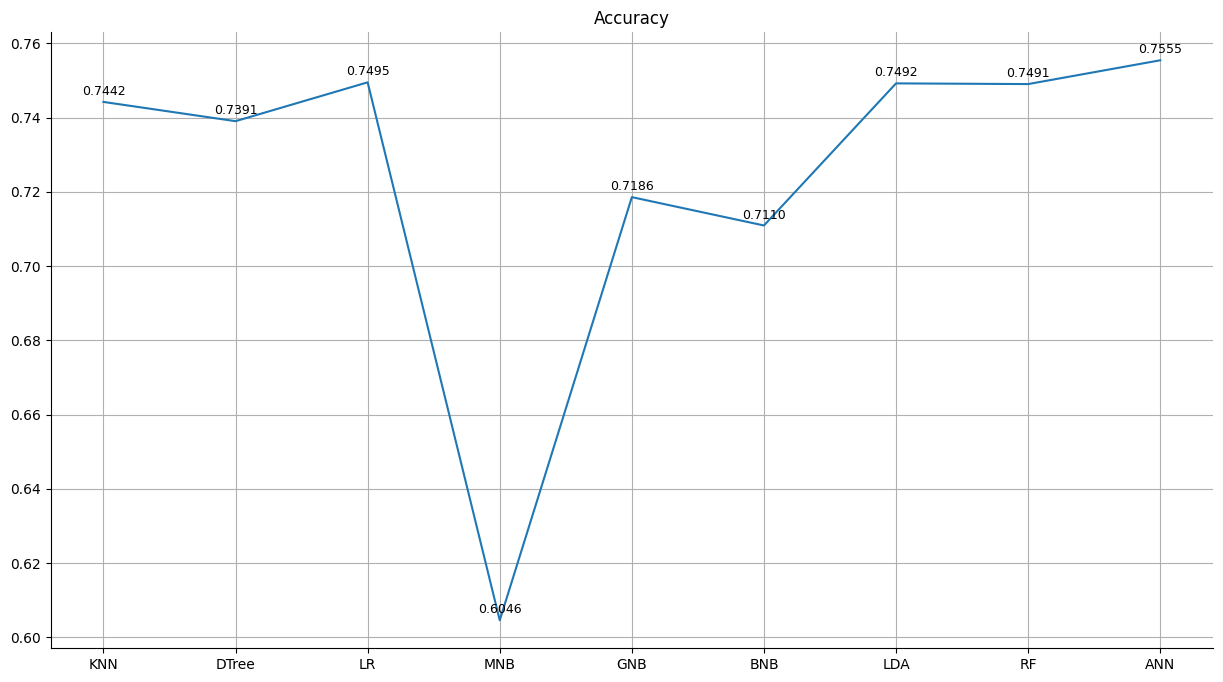

In [105]:
ax = results_df['Accuracy'].plot(kind='line', figsize=(15, 8), title='Accuracy', xticks=range(len(results_df.index)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
for i, value in enumerate(results_df['Accuracy']):
    ax.annotate(f'{value:.4f}', xy=(i, value), xytext=(0, 5), textcoords='offset points', fontsize=9, ha='center')

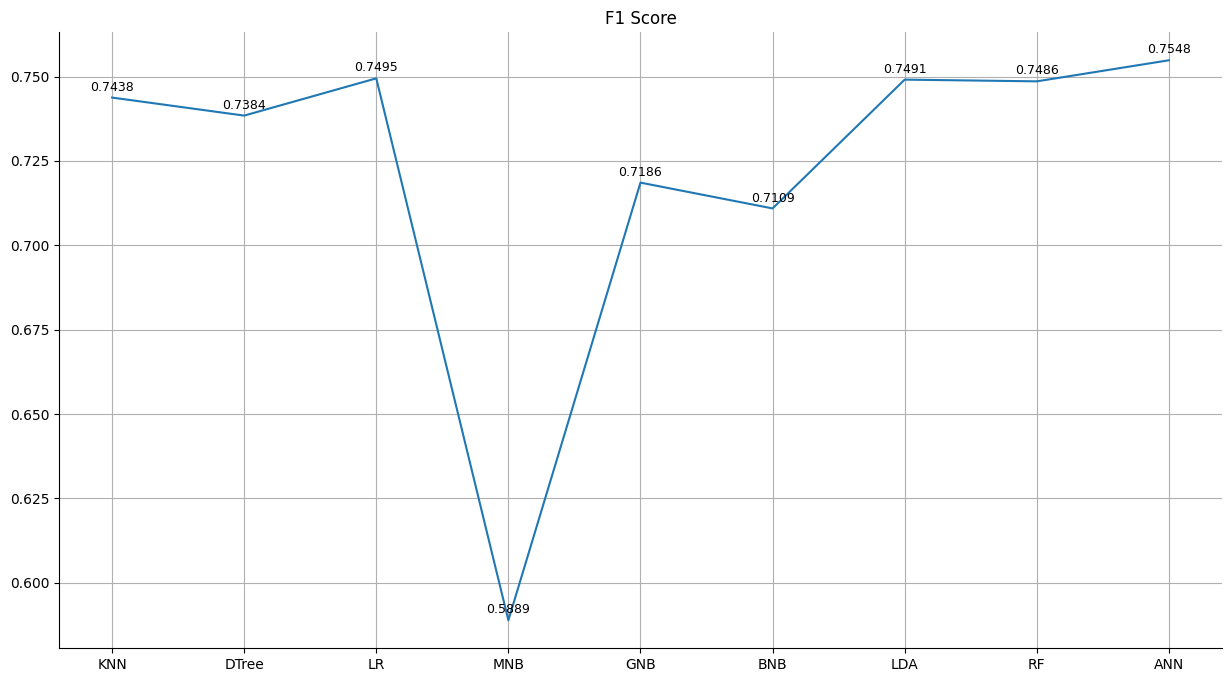

In [106]:
ax = results_df['F1 Score'].plot(kind='line', figsize=(15, 8), title='F1 Score', xticks=range(len(results_df.index)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
for i, value in enumerate(results_df['F1 Score']):
    ax.annotate(f'{value:.4f}', xy=(i, value), xytext=(0, 5), textcoords='offset points', fontsize=9, ha='center')

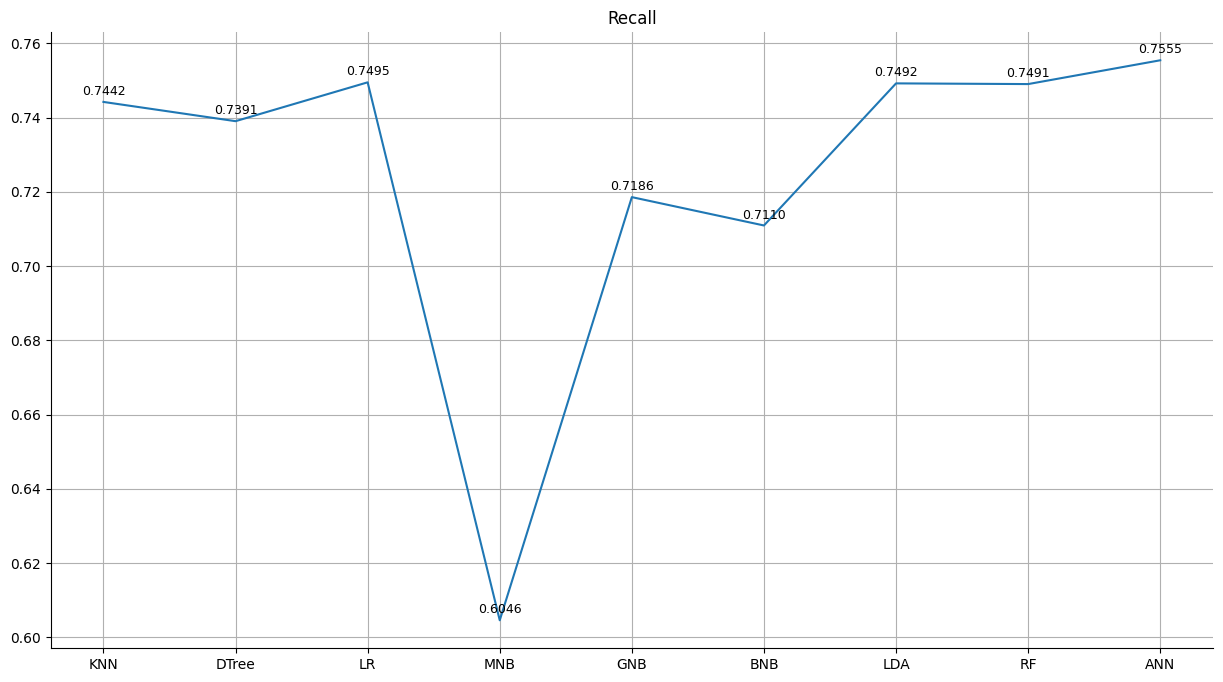

In [107]:
ax = results_df['Recall'].plot(kind='line', figsize=(15, 8), title='Recall', xticks=range(len(results_df.index)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
for i, value in enumerate(results_df['Recall']):
    ax.annotate(f'{value:.4f}', xy=(i, value), xytext=(0, 5), textcoords='offset points', fontsize=9, ha='center')

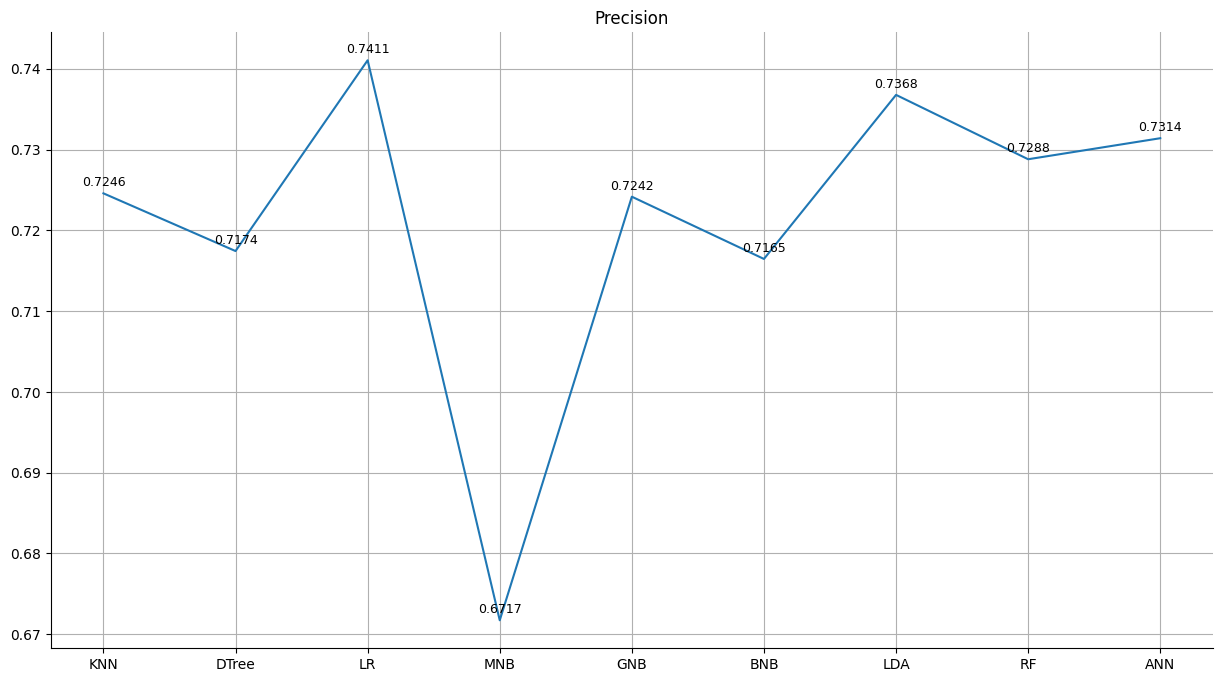

In [120]:
ax = results_df['Precision'].plot(kind='line', figsize=(15, 8), title='Precision', xticks=range(len(results_df.index)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
for i, value in enumerate(results_df['Precision']):
    ax.annotate(f'{value:.4f}', xy=(i, value), xytext=(0, 5), textcoords='offset points', fontsize=9, ha='center')

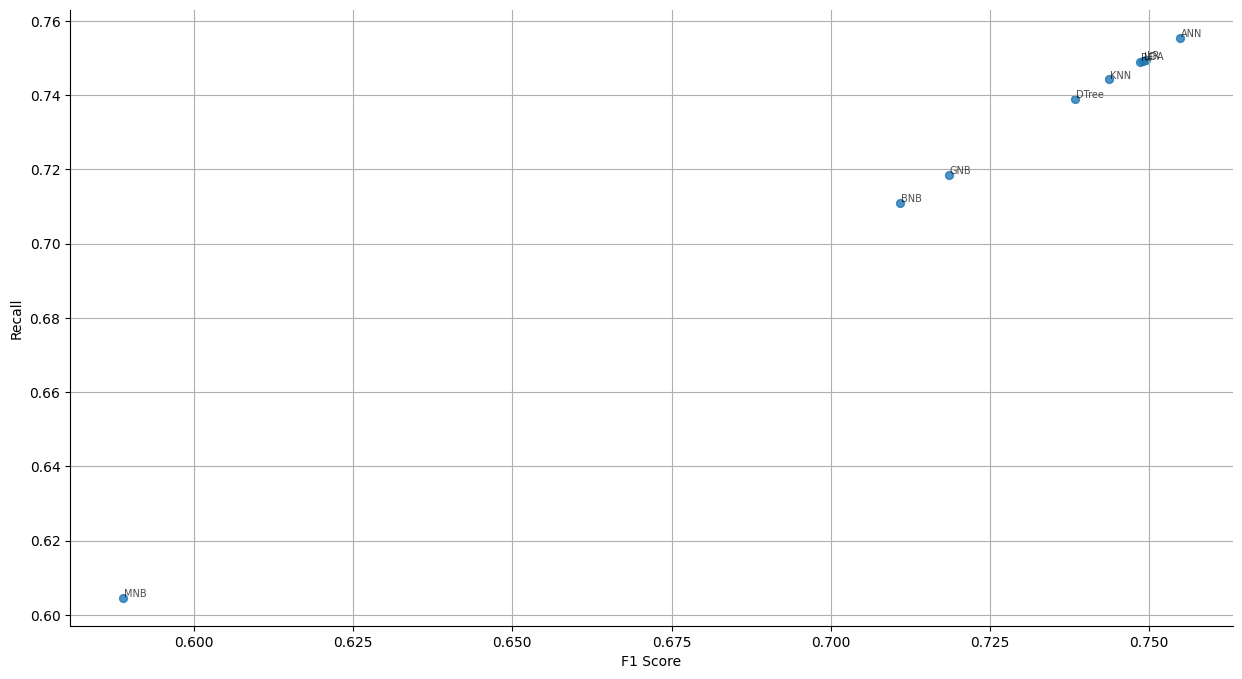

In [111]:
results_df.plot(kind='scatter', x='F1 Score', y='Recall', s=32, alpha=.8, figsize=(15, 8))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
for i, model_name in enumerate(results_df.index):
    plt.annotate(model_name, (results_df['F1 Score'][i], results_df['Recall'][i]), textcoords='offset points', fontsize=7, alpha=.7)

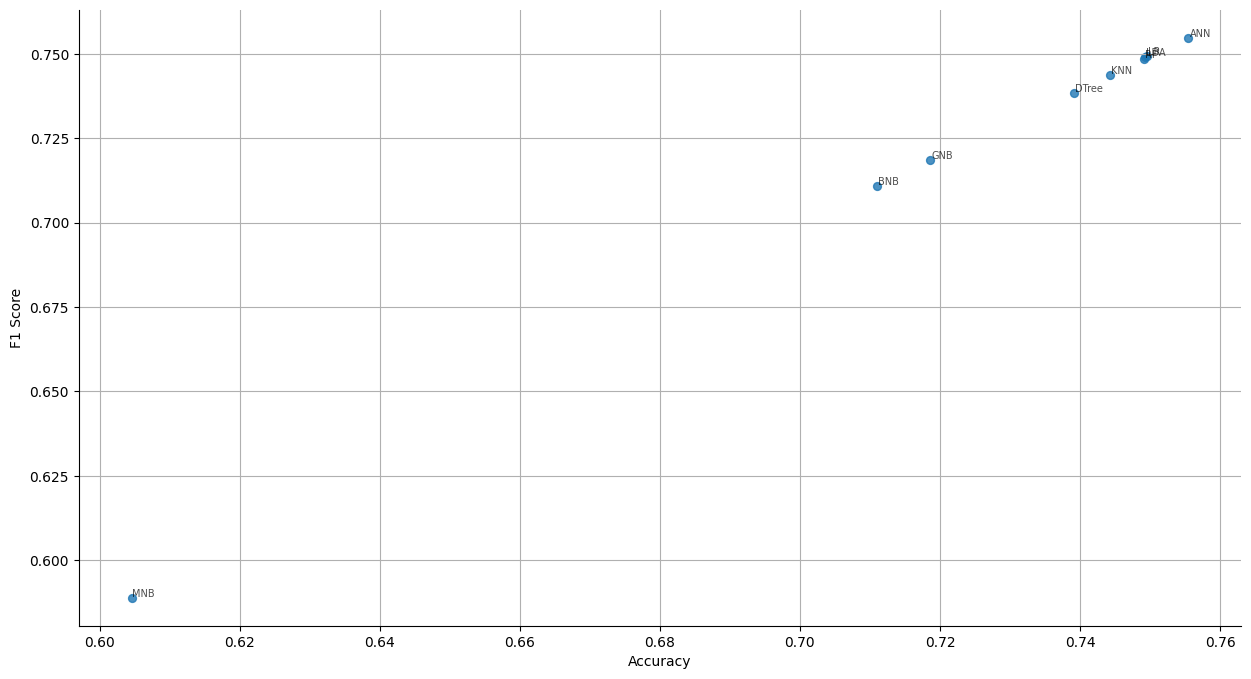

In [112]:
results_df.plot(kind='scatter', x='Accuracy', y='F1 Score', s=32, alpha=.8, figsize=(15, 8))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
for i, model_name in enumerate(results_df.index):
    plt.annotate(model_name, (results_df['Accuracy'][i], results_df['F1 Score'][i]), textcoords='offset points', fontsize=7, alpha=.7)

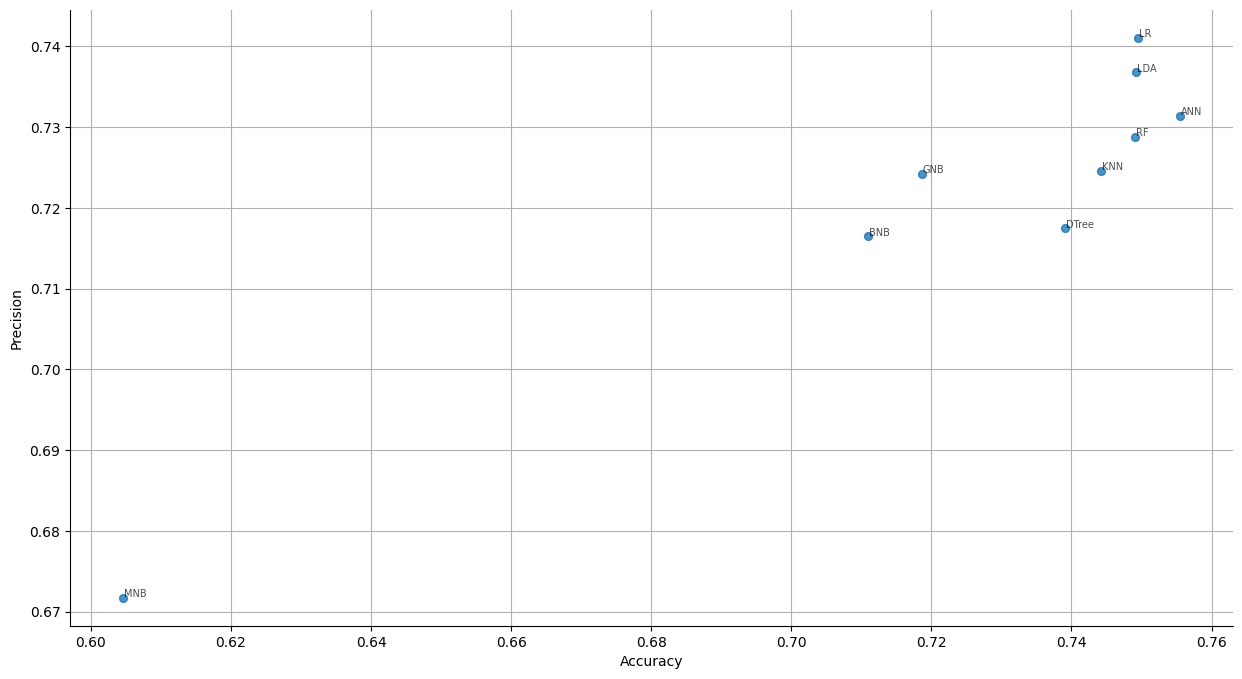

In [113]:
results_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8, figsize=(15, 8))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)
for i, model_name in enumerate(results_df.index):
    plt.annotate(model_name, (results_df['Accuracy'][i], results_df['Precision'][i]), textcoords='offset points', fontsize=7, alpha=.7)

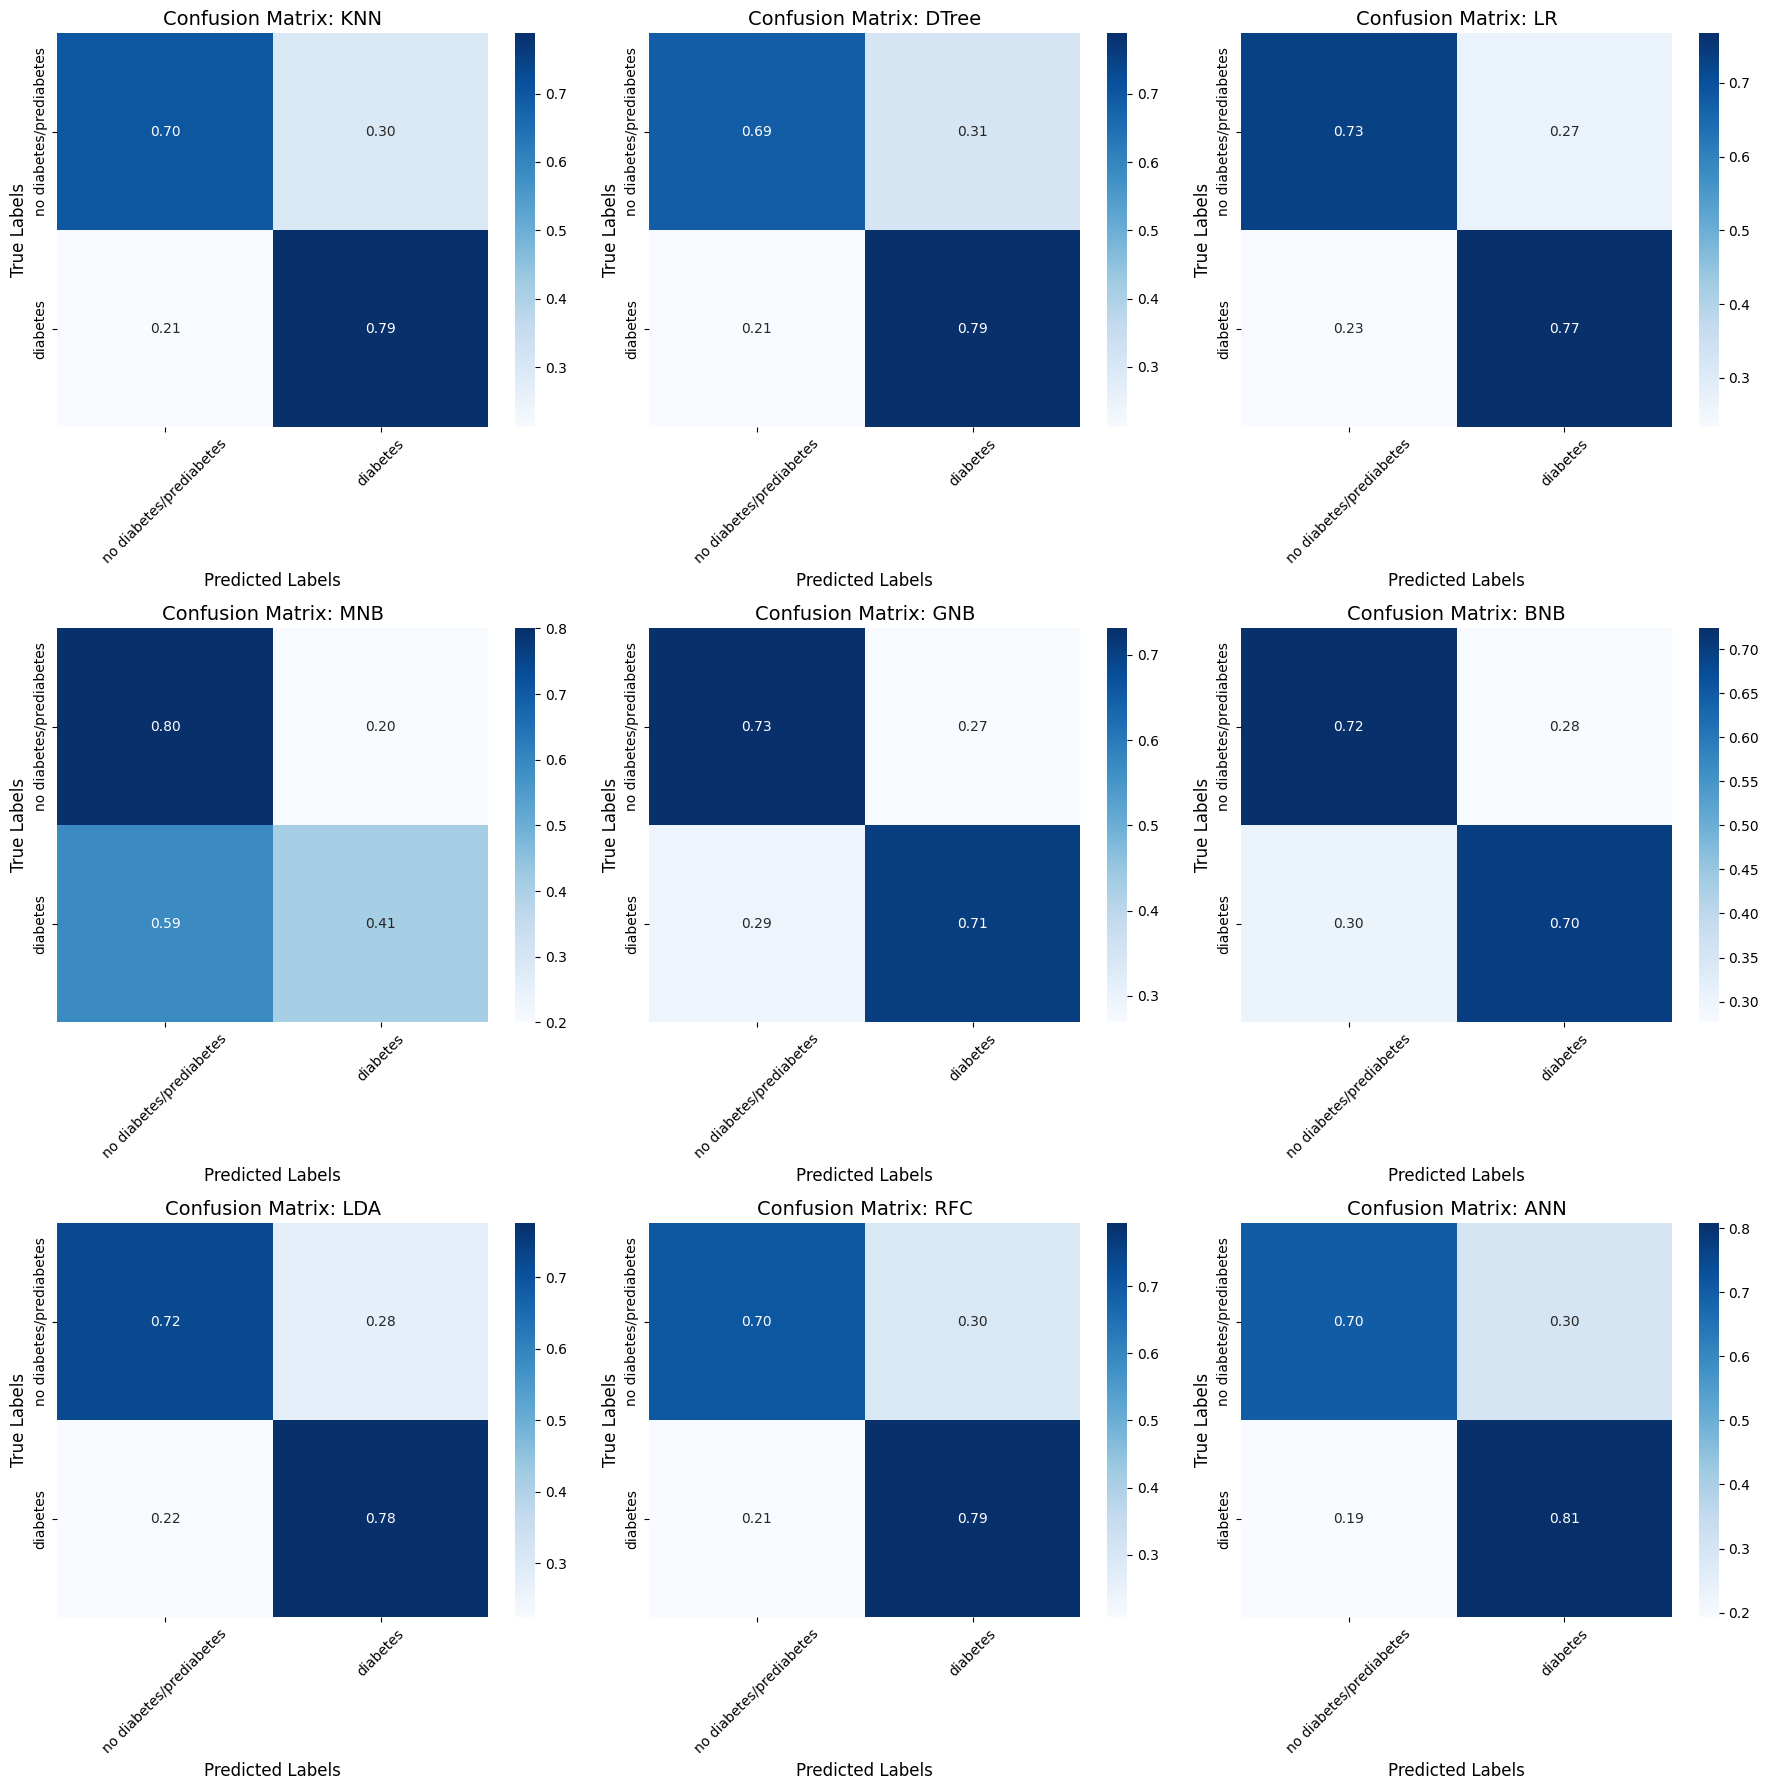

In [114]:
def cm(y_test, y_pred, ax, model):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix as a heatmap
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=list(classes.values()), yticklabels=list(classes.values()), ax=ax)
    ax.set_title(f'Confusion Matrix: {model}', fontsize=14)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    return ax

def plot_confusion_matrices():

    fig, axes = plt.subplots(3, 3, figsize=(6 * 3, 6 * 3))
    axes = axes.ravel()

    models = [
        (y_pred_knn, 'KNN'),
        (y_pred_dtree, 'DTree'),
        (y_pred_lr, 'LR'),
        (y_pred_mnb, 'MNB'),
        (y_pred_gnb, 'GNB'),
        (y_pred_bnb, 'BNB'),
        (y_pred_lda, 'LDA'),
        (y_pred_rfc, 'RFC'),
        (y_pred_ann, 'ANN')
    ]

    for i, (y_pred, model_name) in enumerate(models):
        cm(y_test, y_pred, axes[i], model_name)

    plt.tight_layout()
    plt.show()

plot_confusion_matrices()

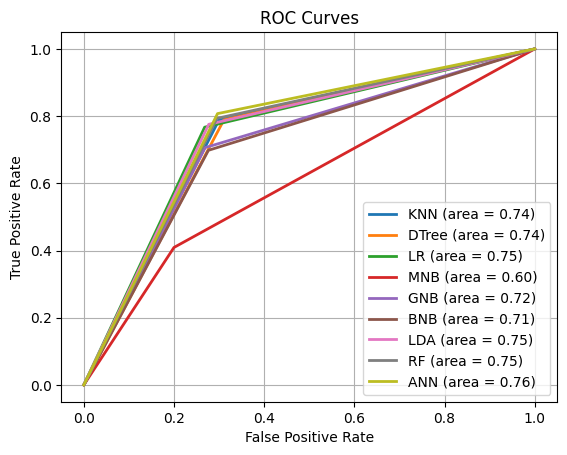

In [121]:
for index, row in results_df.iterrows():
    fpr, tpr , thresholds= row['ROC Curve']
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{index} (area = {roc_auc:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()
